## 2.1

In [11]:
#2.1
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
(train_ds, test_ds), ds_info = tfds.load('mnist', split =['train', 'test'], as_supervised = True, with_info = True)


**How many training/ test images are there?** \
10,000 test images and 60,000 training images \

**What’s the image shape?**\
(28, 28, 1)

**What range are pixel values in?**\
uint8 (0-255)


## 2.2

In [12]:
def prepare_mnist(mnist):
    mnist = mnist.map(lambda img, target: (tf.cast(img, tf.float32), target))
    mnist = mnist.map(lambda img, target: (tf.reshape(img, (-1,)), target))
    mnist = mnist.map(lambda img, target: ((img/128.)-1., target))
    mnist = mnist.map(lambda img, target: (img, tf.one_hot(target, depth=10)))
    mnist = mnist.shuffle(1000)
    mnist = mnist.batch(64)
    mnist = mnist.prefetch(20)
    return mnist

train_dataset = train_ds.apply(prepare_mnist)
test_dataset = test_ds.apply(prepare_mnist)

for input, label in train_dataset:
    break

## 2.3

In [13]:
from tensorflow.keras.layers import Dense

class ModelOne(tf.keras.Model):
    
    def __init__(self):
        super(ModelOne, self).__init__()
        self.dense1 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
        self.out = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

    @tf.function
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.out(x)
        return x

## 2.4

In [34]:
def training_loop(epochs, object, train, test, loss_function, optimizer):
    train_loss_array = []
    test_loss_array = []
    train_accuracy_array = []
    test_accuracy_array = []

    #testing once before we begin
    test_loss, test_accuracy = test_model(object, test, loss_function)
    test_loss_array.append(test_loss)
    test_accuracy_array.append(test_accuracy)

    train_loss, train_accuracy = test_model(object, train, loss_function)
    train_loss_array.append(train_loss)
    train_accuracy_array.append(train_accuracy)


    for epoch in range(epochs):
        epoch_loss = []
        for input, label in train:
            train_loss = training_step(object, input, label, loss_function, optimizer)
            epoch_loss.append(train_loss)
        epoch_loss = tf.reduce_mean(epoch_loss)
        #tf.print("Epoch:", epoch, "Loss:", epoch_loss, "Accuracy:", test_accuracy_array[-1])
        train_loss_array.append(epoch_loss)
        _, train_accuracy = test_model(object, train, loss_function)
        train_accuracy_array.append(train_accuracy)

        test_loss, test_accuracy = test_model(object, test, loss_function)
        test_loss_array.append(test_loss)
        test_accuracy_array.append(test_accuracy)
        tf.print("Epoch:", epoch, "Train Loss:", epoch_loss, "Train Accuracy:", train_accuracy_array[-1], "Test Loss:", test_loss_array[-1], "Test Accuracy:", test_accuracy_array[-1])

    return [train_loss_array, test_loss_array, train_accuracy_array, test_accuracy_array]


def training_step(model, input, label, loss_function, optimizer):
    with tf.GradientTape() as tape:
        prediction = model(input)
        loss = loss_function(label, prediction)
        gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss


def test_model(model, test_data, loss_function):
    test_accuracy_aggregator = []
    test_loss_aggregator = []

    for (input, target) in test_data:
        prediction = model(input, training=False)
        sample_test_loss = loss_function(target, prediction)
        sample_test_accuracy =  np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
        sample_test_accuracy = np.mean(sample_test_accuracy)
        test_loss_aggregator.append(sample_test_loss.numpy())
        test_accuracy_aggregator.append(np.mean(sample_test_accuracy))

    test_loss = tf.reduce_mean(test_loss_aggregator)
    test_accuracy = tf.reduce_mean(test_accuracy_aggregator)

    return test_loss, test_accuracy

In [35]:
epochs = 10
learning_rate = 0.01
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate)

model = ModelOne()
visualization_arrays = training_loop(epochs, model, train_dataset, test_dataset, loss_function, optimizer)


Epoch: 0 Train Loss: 0.548702598 Train Accuracy: 0.8952225479744137 Test Loss: 0.341971517 Test Accuracy: 0.89938296178343946
Epoch: 1 Train Loss: 0.298801392 Train Accuracy: 0.92170842217484006 Test Loss: 0.260942131 Test Accuracy: 0.92436305732484081
Epoch: 2 Train Loss: 0.249040768 Train Accuracy: 0.927671908315565 Test Loss: 0.244365647 Test Accuracy: 0.93132961783439494
Epoch: 3 Train Loss: 0.215756491 Train Accuracy: 0.94409648187633266 Test Loss: 0.195820764 Test Accuracy: 0.94605891719745228
Epoch: 4 Train Loss: 0.18993929 Train Accuracy: 0.94596215351812363 Test Loss: 0.185169026 Test Accuracy: 0.94576035031847139
Epoch: 5 Train Loss: 0.170700476 Train Accuracy: 0.95262526652452029 Test Loss: 0.172425315 Test Accuracy: 0.94785031847133761
Epoch: 6 Train Loss: 0.154206246 Train Accuracy: 0.95855543710021318 Test Loss: 0.156354621 Test Accuracy: 0.95601114649681529
Epoch: 7 Train Loss: 0.140805155 Train Accuracy: 0.96230343816631125 Test Loss: 0.140493542 Test Accuracy: 0.960191

## 2.5

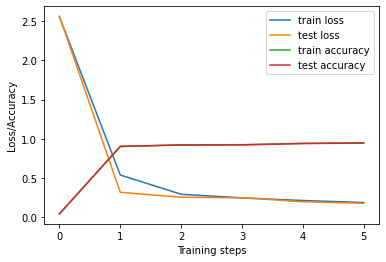

In [ ]:
import matplotlib.pyplot as plt

def visualize(visualization_arrays):
    # Visualize accuracy and loss for training and test data.
    plt.figure()
    line1, = plt.plot(visualization_arrays[0])
    line2, = plt.plot(visualization_arrays[1])
    line3, = plt.plot(visualization_arrays[2])
    line4, = plt.plot(visualization_arrays[3])
    plt.xlabel("Training steps")
    plt.ylabel("Loss/Accuracy")
    plt.legend((line1,line2, line3, line4),("train loss","test loss", "train accuracy", "test accuracy"))
    plt.show()

visualize(visualization_arrays)

## 3

Network Test 1: Only hidden layer with only one neuron. Results are pretty bad, just as to be expected.

Epoch: 0 Train Loss: 2.11934614 Train Accuracy: 0.20184235074626866 Test Loss: 2.01374912 Test Accuracy: 0.20352308917197454
Epoch: 1 Train Loss: 1.96613336 Train Accuracy: 0.22151519189765459 Test Loss: 1.92673349 Test Accuracy: 0.22074044585987262
Epoch: 2 Train Loss: 1.89496982 Train Accuracy: 0.253914578891258 Test Loss: 1.86417854 Test Accuracy: 0.245421974522293
Epoch: 3 Train Loss: 1.8387599 Train Accuracy: 0.24686833688699361 Test Loss: 1.82271719 Test Accuracy: 0.24293391719745222
Epoch: 4 Train Loss: 1.80119658 Train Accuracy: 0.25166577825159914 Test Loss: 1.79093277 Test Accuracy: 0.2474124203821656
Epoch: 5 Train Loss: 1.77492428 Train Accuracy: 0.26126066098081024 Test Loss: 1.7666434 Test Accuracy: 0.25696656050955413
Epoch: 6 Train Loss: 1.75278866 Train Accuracy: 0.28033382196162049 Test Loss: 1.7492919 Test Accuracy: 0.2786624203821656
Epoch: 7 Train Loss: 1.73147798 Train Accuracy: 0.27588619402985076 Test Loss: 1.73035228 Test Accuracy: 0.26970541401273884
Epoch: 8 

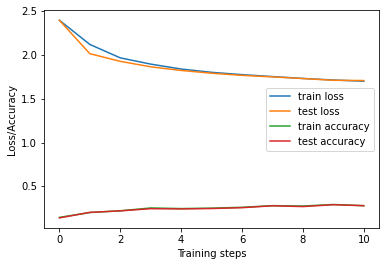

In [36]:
optimizer2 = tf.keras.optimizers.SGD(learning_rate)
class ModelTwo(tf.keras.Model):
    
    def __init__(self):
        super(ModelTwo, self).__init__()
        self.dense1 = tf.keras.layers.Dense(1, activation=tf.nn.relu)
        self.out = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

    @tf.function
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.out(x)
        return x

model2 = ModelTwo()
visualization_arrays2 = training_loop(epochs, model2, train_dataset, test_dataset, loss_function, optimizer2)
visualize(visualization_arrays2)

Network Test 2: More Layers and Units. Results are only marginally better.

Epoch: 0 Train Loss: 0.560755491 Train Accuracy: 0.91469549573560771 Test Loss: 0.285918266 Test Accuracy: 0.91451035031847139
Epoch: 1 Train Loss: 0.261104554 Train Accuracy: 0.92993736673773986 Test Loss: 0.234388784 Test Accuracy: 0.92874203821656054
Epoch: 2 Train Loss: 0.199429214 Train Accuracy: 0.94821095415778256 Test Loss: 0.181418568 Test Accuracy: 0.94376990445859876
Epoch: 3 Train Loss: 0.163994 Train Accuracy: 0.9498434168443497 Test Loss: 0.175969496 Test Accuracy: 0.946656050955414
Epoch: 4 Train Loss: 0.139348 Train Accuracy: 0.96275319829424311 Test Loss: 0.141125873 Test Accuracy: 0.95650875796178347
Epoch: 5 Train Loss: 0.121212959 Train Accuracy: 0.95610674307036247 Test Loss: 0.151955307 Test Accuracy: 0.95272691082802552
Epoch: 6 Train Loss: 0.107612148 Train Accuracy: 0.97181503198294239 Test Loss: 0.119085714 Test Accuracy: 0.96267914012738853
Epoch: 7 Train Loss: 0.095731847 Train Accuracy: 0.974730143923241 Test Loss: 0.108838223 Test Accuracy: 0.9667595541401

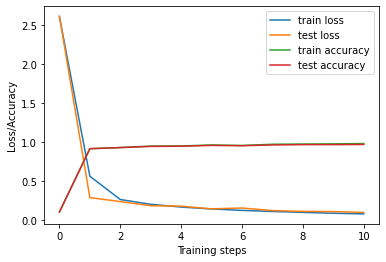

In [37]:
optimizer3 = tf.keras.optimizers.SGD(learning_rate)
class ModelThree(tf.keras.Model):
    
    def __init__(self):
        super(ModelThree, self).__init__()
        self.dense1 = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
        self.dense3 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
        self.dense4 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
        self.out = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

    @tf.function
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.out(x)
        return x

model3 = ModelThree()
visualization_arrays3 = training_loop(epochs, model3, train_dataset, test_dataset, loss_function, optimizer3)
visualize(visualization_arrays3)

Network Test 3: Original Model with different learning rate


Epoch: 0 Train Loss: 1.35915339 Train Accuracy: 0.802688566098081 Test Loss: 0.816909373 Test Accuracy: 0.81279856687898089
Epoch: 1 Train Loss: 0.676989198 Train Accuracy: 0.851629131130064 Test Loss: 0.551025 Test Accuracy: 0.85828025477707
Epoch: 2 Train Loss: 0.515943944 Train Accuracy: 0.87391724413646055 Test Loss: 0.453985512 Test Accuracy: 0.87748805732484081
Epoch: 3 Train Loss: 0.445969611 Train Accuracy: 0.88576092750533053 Test Loss: 0.403169185 Test Accuracy: 0.88962977707006374
Epoch: 4 Train Loss: 0.406029731 Train Accuracy: 0.89102478678038377 Test Loss: 0.374940425 Test Accuracy: 0.89430732484076436
Epoch: 5 Train Loss: 0.379744112 Train Accuracy: 0.8962053571428571 Test Loss: 0.352999121 Test Accuracy: 0.89908439490445857
Epoch: 6 Train Loss: 0.360491753 Train Accuracy: 0.90070295842217485 Test Loss: 0.338846564 Test Accuracy: 0.90495621019108285
Epoch: 7 Train Loss: 0.345874399 Train Accuracy: 0.90335154584221744 Test Loss: 0.328605443 Test Accuracy: 0.90893710191082

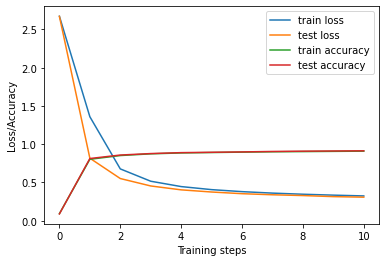

In [38]:
learning_rate = 0.001
optimizer4 = tf.keras.optimizers.SGD(learning_rate)
model = ModelOne()
visualization_arrays4 = training_loop(epochs, model, train_dataset, test_dataset, loss_function, optimizer4)
visualize(visualization_arrays4)

Network Test 4: Different Opzimizer + New learning_rate. Significantly better results.

In [39]:
optimizer5 = tf.keras.optimizers.Adam(learning_rate)
model = ModelOne()
visualization_arrays5 = training_loop(epochs, model, train_dataset, test_dataset, loss_function, optimizer5)
visualize(visualization_arrays5)